## Adaboost

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Fake data that looks like two moons
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data to help models perform better
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Weak learner: Decision stump (shallow tree)
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,         # 100 weak learners
    learning_rate=0.5,
    random_state=42
)

ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.92


c:\Users\yuvra\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [9]:
def plot_decision_boundary(clf, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(X_grid).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    ax.set_title(title)

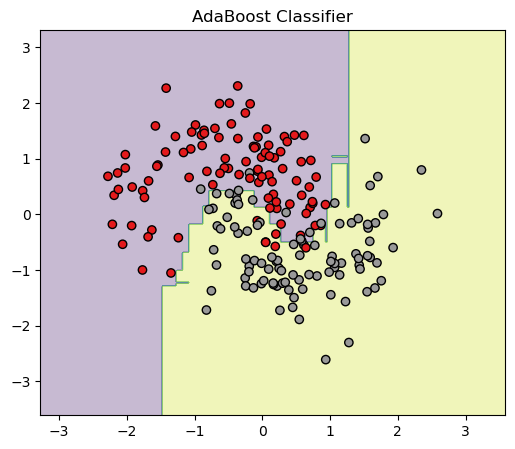

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
plot_decision_boundary(ada_model, X_test, y_test, "AdaBoost Classifier", ax)
plt.show()


##Gradient Boosting

In [11]:
from sklearn.ensemble import GradientBoostingClassifier


In [13]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.905


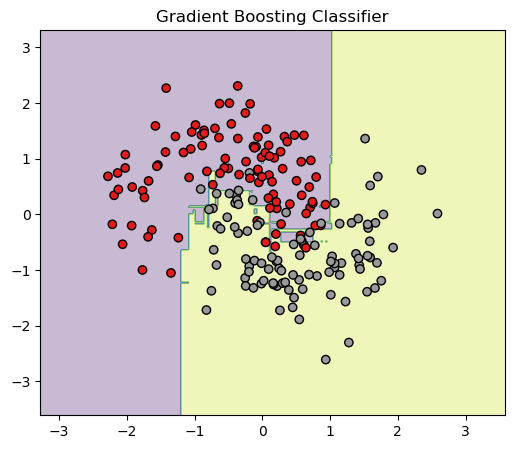

In [14]:
fig, ax = plt.subplots(figsize=(6, 5))
plot_decision_boundary(gb_model, X_test, y_test, "Gradient Boosting Classifier", ax)
plt.show()


##XGBoost (Extreme Gradient Boosting)

In [15]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.9 MB/s eta 0:01:21
   ---------------------------------------- 1.0/150.0 MB 2.2 MB/s eta 0:01:08
   ---------------------------------------- 1.6/150.0 MB 2.3 MB/s eta 0:01:04
    --------------------------------------- 2.1/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 2.6/150.0 MB 2.5 MB/s eta 0:01:00
    --------------------------------------- 3.1/150.0 MB 2.5 MB/s eta 0:01:00
   - -------------------------------------- 3.9/150.0 MB 2.5 MB/s eta 0:00:59
   - -------------------------------------- 4.5/150.0 MB 2.5 MB/s eta 0:00:58
   - -------------------------------------- 5.0/150.0 MB 2.5 MB/s eta 0:00:58
   - -------------------------------------- 5.2/150.0 MB 2.5 MB/s eta 0:00:58
   - -------------------------------------- 5.8/150.0 MB 2.5 MB/s eta 0:00:59


In [16]:
import xgboost as xgb
from xgboost import XGBClassifier


In [17]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss',   # Avoid warning
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.93


c:\Users\yuvra\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:18:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


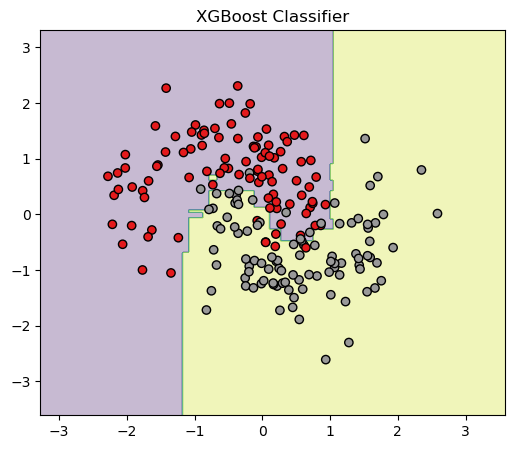

In [18]:
fig, ax = plt.subplots(figsize=(6, 5))
plot_decision_boundary(xgb_model, X_test, y_test, "XGBoost Classifier", ax)
plt.show()


In [21]:
xgb_model_early = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model_early.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False,
    callbacks=[xgb.callback.EarlyStopping(rounds=10)]
)

print("XGBoost with Early Stopping Accuracy:", accuracy_score(y_test, xgb_model_early.predict(X_test)))


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'callbacks'

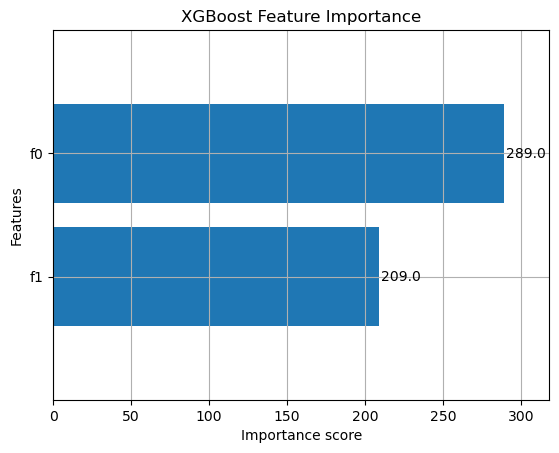

In [20]:
xgb.plot_importance(xgb_model, height=0.8)
plt.title("XGBoost Feature Importance")
plt.show()
